In [1]:
pip install mediapipe


Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
from cv2 import destroyAllWindows
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

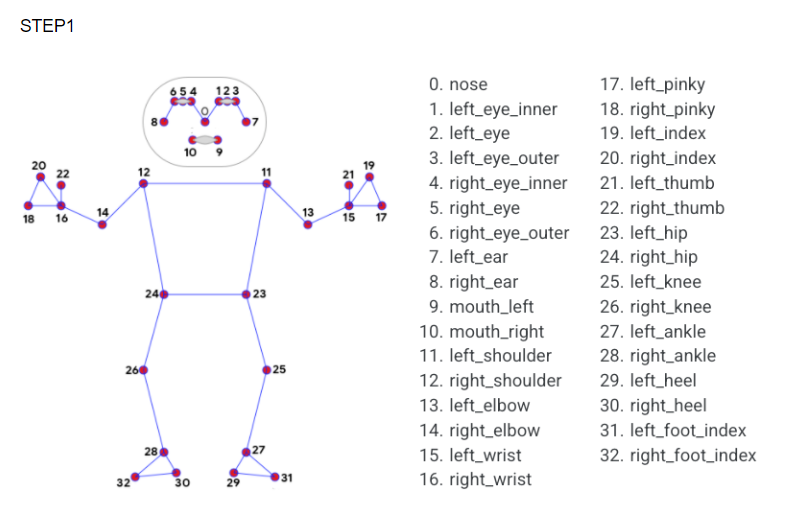

In [4]:

def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle

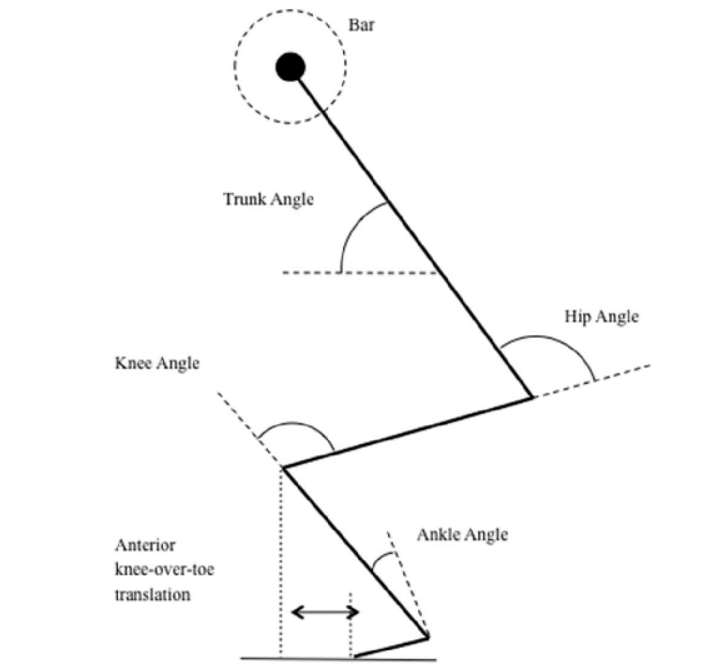


In [5]:
def rescale_frame(frame, percent=50):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)


## Try1

In [2]:
import cv2
import mediapipe as mp
import numpy as np

def calculate_angle(a, b, c):
    """
    Calculate the angle between three points
    """
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

video_path = r"E:\Squat\Input\youTube_video.mp4"
cap = cv2.VideoCapture(video_path)
counter = 0
stage = None

with mp.solutions.pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
    size = (width, height)
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(r"E:\Squat\Output\Output1.mp4", fourcc, 10.0, size, True)

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            shoulder = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_WRIST.value].y]

            hip = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_ANKLE.value].y]

            angle_knee = calculate_angle(hip, knee, ankle)

            cv2.putText(image, str(angle_knee), tuple(np.multiply(knee, [640, 480]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (79, 121, 66), 2, cv2.LINE_AA)

            if angle_knee > 169:
                stage = "UP"
            if angle_knee <= 90 and stage == 'UP':
                stage = "DOWN"
                counter += 1
                print(counter)
        except:
            pass

        cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)
        cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, 'STAGE', (65, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

        mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS,
                                                  mp.solutions.drawing_utils.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                                  mp.solutions.drawing_utils.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

        out.write(image)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()


1
2
3
4
5


## Try2

In [3]:
import cv2
import mediapipe as mp
import numpy as np

def calculate_angle(a, b, c):
    """
    Calculate the angle between three points
    """
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

video_path = r"E:\Squat\Input\BitterFoolishHalcyon-max-1mb.gif"
cap = cv2.VideoCapture(video_path)
counter = 0
stage = None

with mp.solutions.pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
    size = (width, height)
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(r"E:\Squat\Output\Output2.mp4", fourcc, 10.0, size, True)

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            shoulder = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_WRIST.value].y]

            hip = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle = [landmarks[mp.solutions.pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp.solutions.pose.PoseLandmark.LEFT_ANKLE.value].y]

            angle_knee = calculate_angle(hip, knee, ankle)

            angle_text = "Angle: {:.2f}".format(angle_knee)
            cv2.putText(image, angle_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            if angle_knee > 169:
                stage = "UP"
            if angle_knee <= 90 and stage == 'UP':
                stage = "DOWN"
                counter += 1
                print(counter)
        except:
            pass

        cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)
        cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, 'STAGE', (65, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

        mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS,
                                                  mp.solutions.drawing_utils.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                                  mp.solutions.drawing_utils.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

        out.write(image)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()


1


## Try3

In [5]:
!pip install pafy


In [1]:
import cv2
import pafy

# YouTube video URL
video_url = "https://youtu.be/R2dMsNhN3DE"

# Download the YouTube video
video = pafy.new(video_url)
best_stream = video.getbest()
video_path = best_stream.download(filepath="video.mp4")

# Perform angle calculation
cap = cv2.VideoCapture(video_path)
counter = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (e.g., Canny edge detection)
    edges = cv2.Canny(gray, 50, 150)

    # Apply Hough line transform
    lines = cv2.HoughLinesP(edges, 1, cv2.cv2.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # Process detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Calculate angle using line coordinates
            angle = calculate_angle(x1, y1, x2, y2)
            print(f"Angle: {angle} degrees")

    # Display the frame
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    counter += 1

cap.release()
cv2.destroyAllWindows()


ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


OSError: ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.